In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
col_name_prefixes = ['AskPrice', 'AskSize', 'BidPrice', 'BidSize']

col_names = list()
for i in range(10):
    col_names.extend(
        [p + str(i+1) for p in col_name_prefixes]
    )

lob_df = pd.read_csv(
    'data\\amazon_lob_10_levels_lobster\\AMZN_2012-06-21_34200000_57600000_orderbook_10.csv',
    header=None,
    names = col_names
)
lob_df

,AskPrice1,AskSize1,BidPrice1,BidSize1,AskPrice2,AskSize2,BidPrice2,BidSize2,AskPrice3,AskSize3,...,BidPrice8,BidSize8,AskPrice9,AskSize9,BidPrice9,BidSize9,AskPrice10,AskSize10,BidPrice10,BidSize10
0,2239500,100,2231800,100,2239900,100,2230700,200,2240000,220,...,2202500,5000,2294300,100,2202000,100,2298000,100,2189700,100
1,2239500,100,2238100,21,2239900,100,2231800,100,2240000,220,...,2204000,100,2294300,100,2202500,5000,2298000,100,2202000,100
2,2239500,100,2238100,21,2239600,20,2231800,100,2239900,100,...,2204000,100,2267700,100,2202500,5000,2294300,100,2202000,100
3,2239500,100,2238100,21,2239600,20,2237500,100,2239900,100,...,2213000,4000,2267700,100,2204000,100,2294300,100,2202500,5000
4,2239500,100,2238100,21,2239600,20,2237500,100,2239900,100,...,2213000,4000,2267700,100,2204000,100,2294300,100,2202500,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269743,2206200,100,2205100,249,2206400,100,2205000,71,2206500,1290,...,2204300,2300,2207600,100,2204200,100,2207900,2300,2204100,3300
269744,2206400,100,2205100,249,2206500,1290,2205000,71,2206700,170,...,2204300,2300,2207900,2300,2204200,100,2208000,3100,2204100,3300
269745,2206400,100,2205100,249,2206500,1290,2205000,71,2206700,170,...,2204300,2300,2208000,3100,2204200,100,2208100,1700,2204100,3300
269746,2206300,100,2205100,249,2206400,100,2205000,71,2206500,1290,...,2204300,2300,2207900,2300,2204200,100,2208000,3100,2204100,3300


In [4]:
col_names = ['Time', 'Type', 'Id', 'Size', 'Price', 'Direction']
msg_df = pd.read_csv(
    'data\\amazon_lob_10_levels_lobster\\AMZN_2012-06-21_34200000_57600000_message_10.csv',
    header=None,
    names = col_names
)

type_int_to_name_map = {
    1: 'NewLimit', 2: 'Cancellation', 3: 'CancellationTotal', 4: 'ExecutionVisible', 5: 'ExecutionHidden'
}
msg_df['Type'] = msg_df['Type'].apply(lambda x: type_int_to_name_map[x])
msg_df = msg_df[['Time', 'Type', 'Size', 'Price', 'Direction']]

msg_df.head()

,Time,Type,Size,Price,Direction
0,34200.017460,ExecutionHidden,1,2238200,-1
1,34200.189608,NewLimit,21,2238100,1
2,34200.189608,NewLimit,20,2239600,-1
3,34200.189608,NewLimit,100,2237500,1
4,34200.189608,NewLimit,13,2240000,-1


In [5]:
msg_df.describe()

,Time,Size,Price,Direction
count,269748.000000,269748.000000,2.697480e+05,269748.000000
mean,46236.162475,96.870505,2.227204e+06,-0.033587
std,7252.195869,168.846801,1.406809e+04,0.999438
min,34200.017460,1.000000,2.204000e+06,-1.000000
25%,39632.683709,21.000000,2.213000e+06,-1.000000
50%,45755.206530,100.000000,2.226600e+06,-1.000000
75%,53220.267215,100.000000,2.239100e+06,1.000000
max,57599.959360,33570.000000,2.276000e+06,1.000000


<Axes: xlabel='Time', ylabel='Price'>

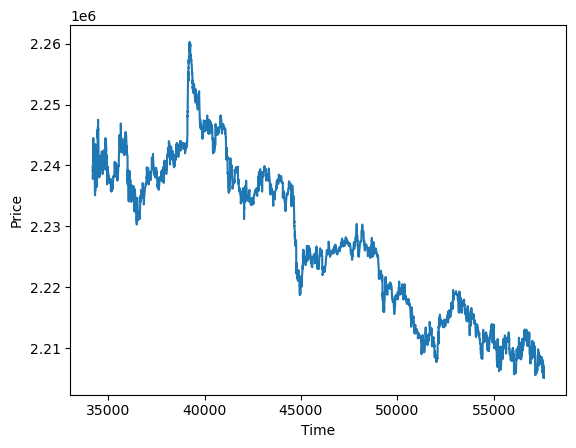

In [ ]:
sns.lineplot(msg_df[msg_df['Type'].str.startswith('Exec')], x='Time', y='Price')

Ad inizio giornata sembra esserci molto movimento

<Axes: xlabel='Type', ylabel='Count'>

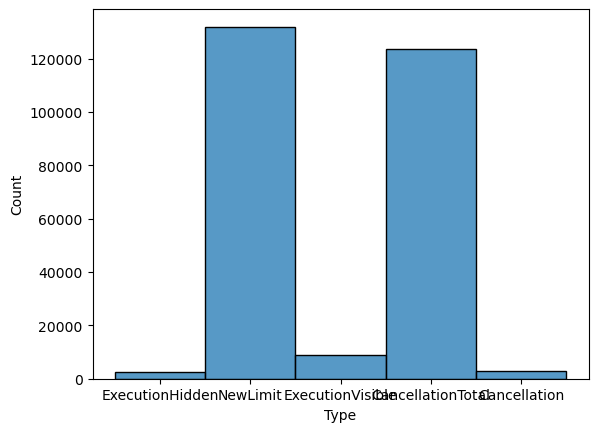

In [6]:
sns.histplot(msg_df, x='Type')

Le cancellazioni totali sono la maggior parte delle cancellazioni. Ci sono anche non trascurabili execution for hiddens

<Axes: xlabel='Price', ylabel='Count'>

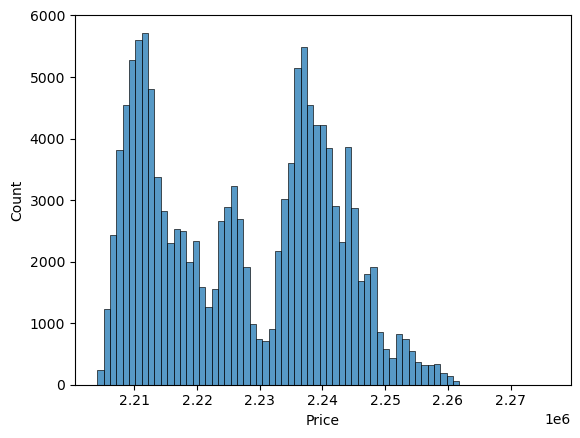

In [7]:
sns.histplot(msg_df[msg_df['Type'].str.startswith('NewLimit')], x='Price')

Dalla distribuzione dei prezzi dei new limit sembra che la distanza tra best e livello 10 molto piccola

In [8]:
(-lob_df['AskPrice1'] + lob_df['AskPrice10']).describe()

count    269748.000000
mean       1642.136735
std        1162.979474
min         900.000000
25%        1200.000000
50%        1500.000000
75%        1800.000000
max       58500.000000
dtype: float64

In [9]:
msg_df.head()

,Time,Type,Size,Price,Direction
0,34200.017460,ExecutionHidden,1,2238200,-1
1,34200.189608,NewLimit,21,2238100,1
2,34200.189608,NewLimit,20,2239600,-1
3,34200.189608,NewLimit,100,2237500,1
4,34200.189608,NewLimit,13,2240000,-1


In [10]:
msg_df[((msg_df['Time'] - msg_df['Time'].shift(1)) == 0) & (msg_df['Type'].str.startswith('Execution'))
       & ((msg_df['Price'] - msg_df['Price'].shift(1)) != 0)]

,Time,Type,Size,Price,Direction
33,34200.190226,ExecutionVisible,26,2237500,1
45,34200.391413,ExecutionVisible,20,2239600,-1
54,34200.401529,ExecutionVisible,90,2239900,-1
58,34200.403006,ExecutionVisible,13,2240000,-1
226,34207.024656,ExecutionHidden,28,2239000,1
...,...,...,...,...,...
269499,57592.016420,ExecutionHidden,100,2205900,-1
269500,57592.016420,ExecutionVisible,100,2206100,-1
269504,57592.105703,ExecutionHidden,100,2205200,1
269520,57592.600779,ExecutionHidden,100,2205900,-1


In [14]:
lob_df.head(3).T.head(10)

,0,1,2
AskPrice1,2239500,2239500,2239500
AskSize1,100,100,100
BidPrice1,2231800,2238100,2238100
BidSize1,100,21,21
AskPrice2,2239900,2239900,2239600
AskSize2,100,100,20
BidPrice2,2230700,2231800,2231800
BidSize2,200,100,100
AskPrice3,2240000,2240000,2239900
AskSize3,220,220,100


Ogni riga di msg corrisponde a una riga di lob, i limit non sono solo quelli che cambiano prezzo

In [16]:
msg_df[msg_df['Type'] == 'ExecutionVisible'].head()

,Time,Type,Size,Price,Direction
32,34200.190226,ExecutionVisible,21,2238100,1
33,34200.190226,ExecutionVisible,26,2237500,1
44,34200.391413,ExecutionVisible,100,2239500,-1
45,34200.391413,ExecutionVisible,20,2239600,-1
46,34200.391413,ExecutionVisible,286,2239600,-1


In [17]:
lob_df[lob_df.index.isin(range(30,34))]

,AskPrice1,AskSize1,BidPrice1,BidSize1,AskPrice2,AskSize2,BidPrice2,BidSize2,AskPrice3,AskSize3,...,BidPrice8,BidSize8,AskPrice9,AskSize9,BidPrice9,BidSize9,AskPrice10,AskSize10,BidPrice10,BidSize10
30,2239500,100,2238100,21,2239600,20,2237500,100,2239900,100,...,2230700,200,2244900,100,2230400,100,2245400,100,2230000,10
31,2239500,100,2238100,21,2239600,20,2237500,100,2239900,100,...,2230700,200,2244900,100,2230400,100,2245000,5,2230000,10
32,2239500,100,2237500,100,2239600,20,2236500,2,2239900,100,...,2230400,100,2244900,100,2230000,10,2245000,5,2226200,100
33,2239500,100,2237500,74,2239600,20,2236500,2,2239900,100,...,2230400,100,2244900,100,2230000,10,2245000,5,2226200,100


In [18]:
msg_df[msg_df['Type'] == 'NewLimit'].head()

,Time,Type,Size,Price,Direction
1,34200.189608,NewLimit,21,2238100,1
2,34200.189608,NewLimit,20,2239600,-1
3,34200.189608,NewLimit,100,2237500,1
4,34200.189608,NewLimit,13,2240000,-1
5,34200.189608,NewLimit,2,2236500,1


In [20]:
lob_df[lob_df.index.isin(range(1,4))]

,AskPrice1,AskSize1,BidPrice1,BidSize1,AskPrice2,AskSize2,BidPrice2,BidSize2,AskPrice3,AskSize3,...,BidPrice8,BidSize8,AskPrice9,AskSize9,BidPrice9,BidSize9,AskPrice10,AskSize10,BidPrice10,BidSize10
1,2239500,100,2238100,21,2239900,100,2231800,100,2240000,220,...,2204000,100,2294300,100,2202500,5000,2298000,100,2202000,100
2,2239500,100,2238100,21,2239600,20,2231800,100,2239900,100,...,2204000,100,2267700,100,2202500,5000,2294300,100,2202000,100
3,2239500,100,2238100,21,2239600,20,2237500,100,2239900,100,...,2213000,4000,2267700,100,2204000,100,2294300,100,2202500,5000


For maket orders, direction = 1 is a market order that hit the bid side, -1 hit ask side

For limit orders, direction = -1 is a limi order on the ask side, 1 on the bid